In [7]:
import numpy as np
import scipy.stats as stt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nibabel as nib
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans

In [8]:
#Feature importance

import shap
import xgboost
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

In [13]:
#IMPORTING DATA

#data = pd.read_excel('your_data.xlsx')

# Prepare input features (X) and target variable (y)
#X = data.drop('target_column', axis=1)
#y = data['target_column']



df = pd.read_excel(r'D:\shabnam\DESU\Projet\Data\file\data.xlsx',sheet_name='Sheet1', nrows=40)
target=resultat=[0 , 0, 0, 0, 0, 1, 1, 1, 0, 0, 0 , 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,1, 0,0,1,0,1,1,0,0,1,0,1,1,0]


print(df.head())
np.shape(df)




   JND_P   IHD     FA_body     MD_body     AD_body     RD_body  \
0   9.56  0.53  5831244768   677999213  1200419224  4167892076   
1   6.69  0.57  6138084616  6380221106  1163350348  3753579911   
2  12.92 -0.14  6278655621  6312712651  1172576822   360618486   
3   1.95  0.49  5967838509  6648115353  1187309233  4035626848   
4   2.54  0.58  6370378274  6361422672  1196716709  3558550471   

          FAsigCC4      MDsigCC4      RDsigCC4         FAsigCC5  ...  \
0  393228846531736  666283952683  443239674205  445477194658377  ...   
1  459472506183274  607842788751  387745455344   60102483240525  ...   
2  555722583727091  616998261949  370446734014  625935381667187  ...   
3  442681410058916  647152127539  402539401995  527874295555111  ...   
4  437844983603095  674717166561  409658199935  653652950539456  ...   

   LH_GMvS1  RH_GMvM1  RH_GMvS1  GMt_M1  GMt_S1  LH_GM_M1S1  RH_GM_M1S1  MVPC  \
0     12151     13247     11836   26766   23987       25670       25083     1   
1     12

(36, 27)

In [12]:
print(df.MVPC)

0      3
1      1
2      3
3      3
4      0
5      1
6      3
7      4
8      7
9      0
10     8
11     1
12     7
13     3
14     7
15     7
16     3
17     0
18     4
19     7
20     5
21    10
22     7
23     3
24     3
25     9
26     6
27     9
28     9
29     3
30     3
31     2
32     7
33     7
34     7
35     7
Name: MVPC, dtype: int64


In [11]:

df.JND_P=df.JND_P / np.mean(df.JND_P)

#_____________________________________________

df.FAsigCC4 =df.FAsigCC4 / np.mean(df.FAsigCC4)

#_____________________________________________
print(df.FAsigCC4)
df.MDsigCC4 =df.MDsigCC4/ np.mean(df.MDsigCC4)
print(df.FAsigCC4 )
#_____________________________________________

df.FA_body =df.FA_body / np.mean(df.FA_body)

df.MD_body =df.MD_body / np.mean(df.MD_body)

df.AD_body =df.AD_body / np.mean(df.AD_body)


df.RD_body =df.RD_body / np.mean(df.RD_body)

df.RDsigCC4 =df.RDsigCC4 / np.mean(df.RDsigCC4)

df.FAsigCC5 =df.FAsigCC5 / np.mean(df.FAsigCC5)

df.LH_GMvM1   =df.LH_GMvM1   / np.mean(df.LH_GMvM1  )


df.RH_GMvM1 =df.RH_GMvM1 / np.mean(df.RH_GMvM1)







df.LH_GMvS1 =df.LH_GMvS1 / np.mean(df.LH_GMvS1)

df.RH_GMvS1 =df.RH_GMvS1 / np.mean(df.RH_GMvS1)

df.GMt_M1   =df.GMt_M1   / np.mean(df.GMt_M1  )


df.GMt_S1 =df.GMt_S1 / np.mean(df.GMt_S1)

df.LH_GM_M1S1   =df.LH_GM_M1S1   / np.mean(df.LH_GM_M1S1  )


df.RH_GM_M1S1 =df.RH_GM_M1S1 / np.mean(df.RH_GM_M1S1)

0      0.105105
1      0.073551
2      0.142045
3      0.021439
4      0.027925
5      0.049254
6      0.105874
7      0.079928
8      0.017811
9      0.040459
10     0.005167
11     0.017041
12     0.119507
13     0.099608
14     0.178436
15     0.073441
16    33.422407
17     0.033422
18     0.186902
19     0.092351
20     0.041998
21     0.099718
22     0.096529
23     0.018360
24     0.029574
25     0.186902
26     0.038260
27     0.163374
28     0.048045
29     0.033532
30     0.057280
31     0.094001
32     0.004068
33     0.077289
34     0.076520
35     0.042877
Name: FAsigCC4, dtype: float64
0      0.105105
1      0.073551
2      0.142045
3      0.021439
4      0.027925
5      0.049254
6      0.105874
7      0.079928
8      0.017811
9      0.040459
10     0.005167
11     0.017041
12     0.119507
13     0.099608
14     0.178436
15     0.073441
16    33.422407
17     0.033422
18     0.186902
19     0.092351
20     0.041998
21     0.099718
22     0.096529
23     0.018360
24     0.

In [11]:
# XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
# Import necessary libraries
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming you have your data in X and y
# X should be your feature matrix and y should be the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the model
accuracy = best_estimator.score(X_test, y_test)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")





# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Accuracy: 0.75


NameError: name 'feature_importance_df' is not defined

<Figure size 720x432 with 0 Axes>

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Accuracy: 0.75


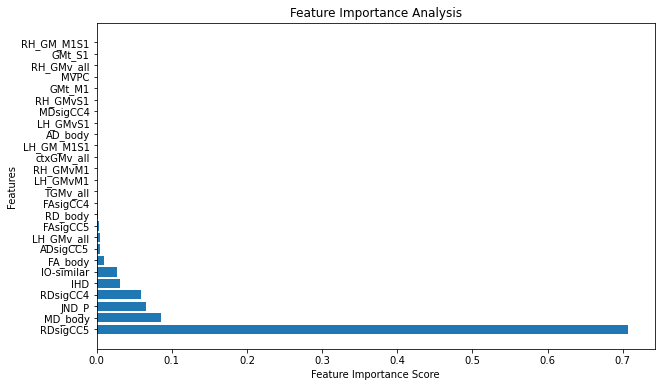

In [6]:
# XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
# Import necessary libraries
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming you have your data in X and y
# X should be your feature matrix and y should be the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the model
accuracy = best_estimator.score(X_test, y_test)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")





# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()


In [ ]:


xgb_regressor = xgboost.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
xgb_regressor.fit(df, target)

#X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=12)


feature_importance_scores = xgb_regressor.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': df.columns, 'Importance': feature_importance_scores})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()


In [6]:
# Another regressor model
# Random forest
print("________Another regressor model___________")
print("________Random forest regressor ___________")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=1)

# Create and train the model
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=1)
rf_regressor.fit(X_train, y_train)

# Make predictions
predictions = rf_regressor.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Feature importance
feature_importance = rf_regressor.feature_importances_
print("Feature Importance:", feature_importance)

print("____________________________________________________________________________")
print("So, the importance of the factors are:\n", feature_importance, "\n respectively for:   ")
print("____________________________________________________________________________")



print("____________________________________________________________________________")

r2 = rf_regressor.score(X_test, y_test)

print("the accuracy of random forest regressor is:",r2 )



rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

________Another regressor model___________
________Random forest regressor ___________
Mean Squared Error: 0.06361562500000001
Feature Importance: [0.04930933 0.06508733 0.00141414 0.00697656 0.00402778 0.02173951
 0.04547023 0.01796958 0.03650764 0.00561238 0.19128076 0.38250502
 0.00966251 0.00567308 0.10486073 0.01042245 0.00640306 0.01411066
 0.00133974 0.00300529 0.0015     0.00340684 0.00215152 0.00327599
 0.00067308 0.00561481]
____________________________________________________________________________
So, the importance of the factors are:
 [0.04930933 0.06508733 0.00141414 0.00697656 0.00402778 0.02173951
 0.04547023 0.01796958 0.03650764 0.00561238 0.19128076 0.38250502
 0.00966251 0.00567308 0.10486073 0.01042245 0.00640306 0.01411066
 0.00133974 0.00300529 0.0015     0.00340684 0.00215152 0.00327599
 0.00067308 0.00561481] 
 respectively for:   
____________________________________________________________________________
____________________________________________________

In [26]:
# Analysis sur les data scaled

#CLUSTERING 

newdata = df[['FA_body','DIFF', 'IHD', 'RDsigCC4','RDsigCC5', 'MD_body', 'JND_P']]
print(newdata)




       FA_body  DIFF   IHD      RDsigCC4      RDsigCC5     MD_body    JND_P
0   5831244768     3  0.53  443239674205  436721222994   677999213     9.56
1   6138084616     8  0.57  387745455344  437219857711  6380221106     6.69
2   6278655621     0 -0.14  370446734014  430543078708  6312712651    12.92
3   5967838509     3  0.49  402539401995  458157553922  6648115353     1.95
4   6370378274     4  0.58  409658199935  354530358024  6361422672     2.54
5   5780164539    -5  0.42  435165482421  467328155854  6752262042     4.48
6   5757033641    -4  0.25  422246992337  478305603794  6556572007     9.63
7   6212309091    -2  0.25   41267764164  486647823286  6298887865     7.27
8   5905297308     0  0.27  380228767897  499605410014  6613531486     1.62
9   6094206506     0  0.12  418606713582  423845794851  6694288381     3.68
10  6428356471    -1  0.77  374372880119  405725575549  6646660504     0.47
11  6352774493     6  1.06  393194435634  342632398455  6312823007     1.55
12  59987628